## 1. Connection to the database
## 2. Get in touch with your database!
## 3. SELECT, FROM ,WHERE, DISTINCT, ORDER BY, TOP, AND & OR, LIKE, IN, EXIST
## 4. Data definiton language(DDL), Data manipualtion language(DML)
## 5. SQL Joins
## 6. WINDOW FUNCTIONS
## 7. Subquery, CTE, Temporary tables, Views


# <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 1. Connection to the database

In [1]:
import pypyodbc as odbc
import pandas as pd
from sqlalchemy import create_engine

DRIVER_NAME = "SQL SERVER"
SERVER_NAME = "DESKTOP-BQPNNC8\SQLEXPRESS"
DATABASE_NAME = "Eshop"

#uid=<username>;
#pwd=<passowrd>;
connection_string = F"""
    DRIVER={{{DRIVER_NAME}}};
    SERVER={SERVER_NAME};
    DATABASE={DATABASE_NAME};
    Trust_Connection=yes;

"""

conn = odbc.connect(connection_string)
print(conn)

In [2]:
connection_string = f"mssql+pyodbc://{SERVER_NAME}/{DATABASE_NAME}?driver={DRIVER_NAME}"

# Create a database engine
engine = create_engine(connection_string)




In [3]:
# SQL query to execute
sql_query = "SELECT Name, Unitprice FROM Production.Products"

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,Name,Unitprice
0,Product HHYDP,18.00
1,Product RECZE,19.00
2,Product IMEHJ,10.00
3,Product KSBRM,22.00
4,Product EPEIM,21.35
...,...,...
72,Product WEUJZ,15.00
73,Product BKAZJ,10.00
74,Product BWRLG,7.75
75,Product JYGFE,18.00


# <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 2. Get in touch with your database!

## <span style="color: blue;">SQL Query for Generating Table and Key Information Report

This SQL query is designed to retrieve detailed information about tables and their associated keys (primary keys, foreign keys, and unique constraints) from a database. The query utilizes Microsoft SQL Server's system views to gather metadata about the database schema and relationships between tables.

In [5]:
# SQL query to execute
sql_query = '''SELECT 
    t.name AS table_name,
    c.name AS column_name,
    type_name(c.user_type_id) AS data_type,
    CASE WHEN pk.name IS NOT NULL THEN 'Primary Key' ELSE '' END AS key_type,
    CASE WHEN fk.name IS NOT NULL THEN 'Foreign Key' ELSE '' END AS key_type,
    CASE WHEN uk.name IS NOT NULL THEN 'Unique Constraint' ELSE '' END AS key_type
FROM sys.tables AS t
JOIN sys.columns AS c ON t.object_id = c.object_id
LEFT JOIN sys.index_columns ic ON ic.object_id = t.object_id AND ic.column_id = c.column_id
LEFT JOIN sys.indexes i ON ic.object_id = i.object_id AND ic.index_id = i.index_id
LEFT JOIN sys.key_constraints pk ON i.object_id = pk.parent_object_id AND i.index_id = pk.unique_index_id
LEFT JOIN sys.foreign_key_columns fkc ON fkc.parent_object_id = t.object_id AND fkc.parent_column_id = c.column_id
LEFT JOIN sys.foreign_keys fk ON fkc.constraint_object_id = fk.object_id
LEFT JOIN sys.key_constraints uk ON i.object_id = uk.parent_object_id AND i.index_id = uk.unique_index_id
WHERE t.type = 'U'  -- 'U' indicates user-defined tables
ORDER BY t.name, c.column_id;'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,table_name,column_name,data_type,key_type,key_type,key_type
0,Categories,CategoryID,int,Primary Key,,Unique Constraint
1,Categories,Name,nvarchar,,,
2,Categories,Description,nvarchar,,,
3,Customers,CustomerID,int,Primary Key,,Unique Constraint
4,Customers,CompanyName,nvarchar,,,
...,...,...,...,...,...,...
69,sysdiagrams,name,sysname,Primary Key,,Unique Constraint
70,sysdiagrams,principal_id,int,Primary Key,,Unique Constraint
71,sysdiagrams,diagram_id,int,Primary Key,,Unique Constraint
72,sysdiagrams,version,int,,,




### SQL Query Explanation

The SQL query performs the following tasks:

1. **Selection of Columns**: The query selects various columns from the system views to provide comprehensive information about each column in the tables.

2. **Table and Column Information**: It retrieves the name of the table and the corresponding column, along with the data type of the column.

3. **Key Detection**:
   - The `CASE` statements are used to determine if a column is part of a primary key, foreign key, or unique constraint.
   - The `LEFT JOIN` clauses connect the columns to their associated keys using relevant system views.
   
4. **Joining System Views**: The query joins the following system views to gather key-related information:
   - `sys.tables` and `sys.columns` for table and column information.
   - `sys.index_columns`, `sys.indexes`, and `sys.key_constraints` for primary keys and unique constraints.
   - `sys.foreign_key_columns` and `sys.foreign_keys` for foreign key relationships.

5. **Filtering User-Defined Tables**: The `WHERE` clause filters out system tables and focuses only on user-defined tables (identified by `t.type = 'U'`).

6. **Ordering Results**: The results are ordered by table name and column ID for a structured presentation.

### Use of the Report

The generated report provides valuable insights into the database schema and its relationships. It can be used for the following purposes:

1. **Schema Documentation**: The report serves as documentation for the database schema, making it easier for developers, administrators, and analysts to understand the structure of tables and their relationships.

2. **Data Modeling**: The report aids in data modeling and database design by highlighting primary keys, foreign keys, and unique constraints, helping ensure data integrity and accuracy.

3. **Database Maintenance**: When maintaining or troubleshooting a database, this report can assist in identifying keys and constraints that play a crucial role in data management.

4. **Data Analysis**: Analysts can use the report to gain insights into the relationships between tables, which is essential for performing complex queries and aggregations.

5. **Education and Training**: This report can be included in tutorials, manuals, or training materials to teach SQL concepts, including table relationships and key types.

By utilizing this SQL query and generating the associated report, users can better understand the structure of their database and make informed decisions regarding data management, analysis, and optimization.

## <span style="color: blue;">SQL Query for Retrieving Table and Column Information</span>

This SQL query is designed to retrieve basic information about tables and their columns from a database. The query utilizes Microsoft SQL Server's system views to gather metadata about the database schema.


In [6]:
# SQL query to execute
sql_query = '''SELECT 
    t.name AS table_name,
    c.name AS column_name,
    type_name(c.user_type_id) AS data_type
FROM sys.tables AS t
JOIN sys.columns AS c ON t.object_id = c.object_id
ORDER BY t.name, c.column_id;'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,table_name,column_name,data_type
0,Categories,CategoryID,int
1,Categories,Name,nvarchar
2,Categories,Description,nvarchar
3,Customers,CustomerID,int
4,Customers,CompanyName,nvarchar
...,...,...,...
67,sysdiagrams,name,sysname
68,sysdiagrams,principal_id,int
69,sysdiagrams,diagram_id,int
70,sysdiagrams,version,int


### SQL Query Explanation

The SQL query performs the following tasks:

1. **Selection of Columns**: The query selects columns that provide essential information about each table's name and each column's name and data type.

2. **Table and Column Information**: It retrieves the name of the table and the corresponding column, along with the data type of the column.

3. **Joining System Views**: The query uses the `sys.tables` and `sys.columns` system views to join tables with their respective columns based on the `object_id`.

4. **Ordering Results**: The results are ordered by table name and column ID for a structured presentation.

### Use of the Query

This query is particularly useful when you need to quickly access fundamental information about the tables and columns within a database:

1. **Schema Exploration**: The query allows you to explore the structure of the database by providing a list of all tables and their associated columns.

2. **Data Type Assessment**: By including the data type information, you can assess the types of data stored in each column.

3. **Database Documentation**: This query can be used to create documentation or a snapshot of the database schema for reference purposes.

4. **Development and Debugging**: When developing applications or debugging, you can use this query to verify column names and data types in the database.

5. **Initial Data Profiling**: Data analysts and data scientists can use this query to perform initial profiling of the dataset, understanding its structure before diving into more complex analysis.

6. **Learning SQL**: This query is also helpful for individuals learning SQL, as it demonstrates basic querying and joining concepts.

By executing this SQL query, you can quickly obtain an overview of the tables and columns within your database, aiding in database exploration, development, documentation, and learning.

## <span style="color: blue;">SQL Query for Retrieving Primary Key Columns
This SQL query is designed to retrieve information about primary key columns within tables of a database. The query leverages Microsoft SQL Server's system views to extract metadata about primary key constraints and their associated columns.

In [8]:
# SQL query to execute
sql_query = '''SELECT t.name AS table_name, c.name AS primary_key_column
FROM sys.tables AS t
JOIN sys.index_columns AS ic ON t.object_id = ic.object_id
JOIN sys.columns AS c ON ic.object_id = c.object_id AND ic.column_id = c.column_id
JOIN sys.indexes AS i ON ic.object_id = i.object_id AND ic.index_id = i.index_id
WHERE i.is_primary_key = 1
ORDER BY t.name, ic.key_ordinal'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,table_name,primary_key_column
0,Categories,CategoryID
1,Customers,CustomerID
2,Employees,EmployeeID
3,OrderDetails,OrderID
4,OrderDetails,ProductID
5,Orders,OrderID
6,Products,ProductID
7,Shippers,ShipperID
8,Suppliers,SupplierID
9,sysdiagrams,diagram_id


### SQL Query Explanation

The SQL query performs the following tasks:

1. **Selection of Columns**: The query selects columns that provide insights into primary key information:
   - `table_name`: The name of the table with a primary key constraint.
   - `primary_key_column`: The name of the column that constitutes the primary key.

2. **Joining System Views**:
   - The query begins by selecting from the `sys.tables` system view to access information about tables.
   - It joins the `sys.index_columns` system view to link tables with their associated index columns (including primary keys).
   - Subsequent joins with the `sys.columns` and `sys.indexes` system views retrieve column and index information.

3. **Filtering Primary Keys**:
   - The `WHERE` clause filters results to only include rows where the index is a primary key (indicated by `i.is_primary_key = 1`).

4. **Inner Joins**:
   - Inner joins are utilized to link tables, index columns, and columns, ensuring accurate associations.

5. **Ordering Results**:
   - The query orders the results by table name and key ordinal for clear presentation.

### Use of the Query

This query serves several valuable purposes:

1. **Key Identification**: It provides a quick overview of tables and their primary key columns, helping identify unique identifiers in the data.

2. **Data Integrity Check**: By identifying primary key columns, the query helps ensure data integrity and consistency within tables.

3. **Schema Documentation**: When documenting the database schema, this query can be used to detail primary key information for reference.

4. **Data Modeling and Analysis**: For data modelers and analysts, understanding primary keys is crucial for data modeling and efficient analysis.

5. **Optimization**: In database optimization efforts, identifying primary keys aids in creating efficient indexes for faster data retrieval.

By executing this SQL query, you can obtain insights into primary key columns within tables, contributing to better understanding of data structure, relationships, and database optimization.

## <span style="color: blue;">SQL Query for Retrieving Foreign Key Relationships
This SQL query is designed to retrieve information about foreign key relationships between tables in a database. The query utilizes Microsoft SQL Server's system views to extract metadata about foreign key constraints and their associated columns.

In [7]:
# SQL query to execute
sql_query = '''SELECT
    OBJECT_NAME(fk.parent_object_id) AS parent_table,
    c1.name AS parent_column,
    OBJECT_NAME(fk.referenced_object_id) AS referenced_table,
    c2.name AS referenced_column
FROM sys.foreign_keys AS fk
INNER JOIN sys.foreign_key_columns AS fkc ON fk.object_id = fkc.constraint_object_id
INNER JOIN sys.columns AS c1 ON fkc.parent_object_id = c1.object_id AND fkc.parent_column_id = c1.column_id
INNER JOIN sys.columns AS c2 ON fkc.referenced_object_id = c2.object_id AND fkc.referenced_column_id = c2.column_id;'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,parent_table,parent_column,referenced_table,referenced_column
0,Employees,ManagerID,Employees,EmployeeID
1,Products,CategoryID,Categories,CategoryID
2,Products,SupplierID,Suppliers,SupplierID
3,OrderDetails,OrderID,Orders,OrderID
4,OrderDetails,ProductID,Products,ProductID
5,Orders,CustomerID,Customers,CustomerID
6,Orders,EmployeeID,Employees,EmployeeID
7,Orders,ShipperID,Shippers,ShipperID


### SQL Query Explanation

The SQL query performs the following tasks:

1. **Selection of Columns**: The query selects columns that provide insights into foreign key relationships:
   - `parent_table`: The name of the parent (referencing) table.
   - `parent_column`: The name of the column in the parent table that is part of the foreign key relationship.
   - `referenced_table`: The name of the referenced (child) table in the foreign key relationship.
   - `referenced_column`: The name of the column in the referenced table corresponding to the parent column.

2. **Joining System Views**:
   - The query starts by selecting from the `sys.foreign_keys` system view to access information about foreign key constraints.
   - It joins the `sys.foreign_key_columns` system view to associate foreign keys with their respective columns.
   - Subsequent joins with the `sys.columns` system view retrieve the names of the parent and referenced columns.

3. **Use of Functions**:
   - The `OBJECT_NAME` function is utilized to convert object IDs into actual table names, enhancing readability.

4. **Inner Joins**:
   - The query employs inner joins to connect foreign keys with their columns and to associate columns with their respective tables.

### Use of the Query

This query serves the following purposes:

1. **Relationship Visualization**: It provides a clear view of foreign key relationships, helping to understand how tables are connected through references.

2. **Data Model Analysis**: For database administrators and data modelers, this query aids in analyzing the structure and integrity of the data model.

3. **Foreign Key Validation**: The query helps validate foreign key relationships, ensuring data consistency and referential integrity.

4. **Database Documentation**: When documenting the database schema, this query can provide valuable insights into relationships for reference.

5. **Debugging and Troubleshooting**: During debugging or troubleshooting, understanding foreign key relationships can be critical for identifying data-related issues.

By executing this SQL query, you can gain a deeper understanding of how tables in your database are connected through foreign keys, ensuring data accuracy and facilitating efficient analysis.

## <span style="color: blue;">SQL Query for Counting Rows in Tables

This SQL query is designed to count the number of rows in user-defined tables within a database. The query utilizes Microsoft SQL Server's system views to access metadata about tables and partitions.


In [9]:
# SQL query to execute
sql_query = '''SELECT t.name AS table_name, p.rows AS row_count
FROM sys.tables AS t
INNER JOIN sys.partitions AS p ON t.object_id = p.object_id
WHERE t.type_desc = 'USER_TABLE' AND p.index_id <= 1
ORDER BY p.rows DESC;'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,table_name,row_count
0,OrderDetails,2155
1,Orders,830
2,Customers,91
3,Products,77
4,Suppliers,29
5,Employees,9
6,Categories,8
7,Shippers,3
8,sysdiagrams,0


### SQL Query Explanation

The SQL query performs the following tasks:

1. **Selection of Columns**: The query selects columns that provide insights into table row counts:
   - `table_name`: The name of the user-defined table.
   - `row_count`: The count of rows present in the table.

2. **Joining System Views**:
   - The query starts by selecting from the `sys.tables` system view to access information about tables.
   - It performs an inner join with the `sys.partitions` system view to link tables with their associated partitions.

3. **Filtering User-Defined Tables**:
   - The `WHERE` clause filters results to include only user-defined tables (indicated by `t.type_desc = 'USER_TABLE'`).

4. **Counting Rows**:
   - The `p.rows` column from the `sys.partitions` view provides the row count for each table.

5. **Ordering Results**:
   - The query orders the results by row count in descending order for clear presentation.

### Use of the Query

This query serves multiple important purposes:

1. **Data Size Assessment**: It allows you to quickly assess the size of tables by providing row counts, aiding in understanding data distribution.

2. **Database Optimization**: By identifying large tables, this query helps in optimizing database performance and resource utilization.

3. **Data Profiling**: Data analysts can use this query for initial data profiling, understanding data volume within tables.

4. **Capacity Planning**: Database administrators can leverage this query for capacity planning and resource allocation decisions.

5. **Table Prioritization**: When working with large databases, this query helps prioritize attention to tables with the most rows.

By executing this SQL query, you can obtain insights into the row counts of user-defined tables, assisting in data analysis, optimization, and planning efforts.

## <span style="color: blue;">SQL Query for Listing Tables with Column Counts

This SQL query is designed to list user-defined tables along with the count of columns in each table within a database. The query leverages Microsoft SQL Server's system views to access metadata about tables and columns.


In [10]:
# SQL query to execute
sql_query = '''SELECT t.name AS table_name, COUNT(c.name) AS column_count
FROM sys.tables AS t
JOIN sys.columns AS c ON t.object_id = c.object_id
WHERE t.type_desc = 'USER_TABLE'
GROUP BY t.name;'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Print the DataFrame
df

,table_name,column_count
0,Categories,3
1,Customers,11
2,Employees,14
3,OrderDetails,5
4,Orders,14
5,Products,6
6,Shippers,3
7,Suppliers,11
8,sysdiagrams,5


The SQL query performs the following tasks:

1. **Selection of Columns**: The query selects columns that provide insights into tables and column counts:
   - `table_name`: The name of the user-defined table.
   - `column_count`: The count of columns present in the table.

2. **Joining System Views**:
   - The query starts by selecting from the `sys.tables` system view to access information about tables.
   - It performs an inner join with the `sys.columns` system view to link tables with their associated columns.

3. **Filtering User-Defined Tables**:
   - The `WHERE` clause filters results to include only user-defined tables (indicated by `t.type_desc = 'USER_TABLE'`).

4. **Counting Columns**:
   - The `COUNT(c.name)` function calculates the number of columns for each table.

5. **Grouping Results**:
   - The `GROUP BY` clause groups the results by table name, providing one row per table.

### Use of the Query

This query serves a specific purpose that can aid in database orientation and analysis:

1. **Table Overview**: It provides an overview of user-defined tables and the number of columns within each table.

2. **Schema Assessment**: Data modelers and administrators can quickly assess the complexity of tables by reviewing column counts.

3. **Schema Documentation**: This query can be used to document table structures, aiding in future reference and understanding.

4. **Database Navigation**: When exploring an unfamiliar database, this query helps identify key tables and their attributes.

By executing this SQL query, you can efficiently obtain insights into the structure and complexity of user-defined tables, facilitating database analysis and exploration.

## <span style="color: blue;">SQL Scheme and Python visualization
    
    This SQL code provides you with the visualized schema of your database content

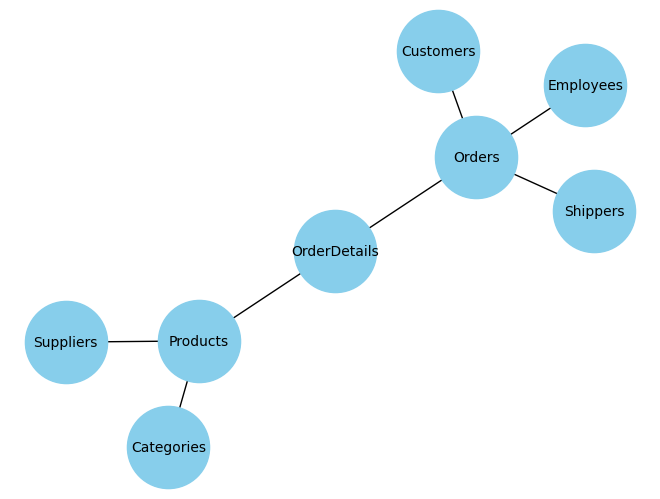

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample SQL query (replace with your actual SQL query)
sql_query = '''SELECT
                    fk.name AS foreign_key_name,
                    OBJECT_NAME(fk.parent_object_id) AS parent_table,
                    c1.name AS parent_column,
                    OBJECT_NAME(fk.referenced_object_id) AS referenced_table,
                    c2.name AS referenced_column
                FROM sys.foreign_keys AS fk
                INNER JOIN sys.foreign_key_columns AS fkc ON fk.object_id = fkc.constraint_object_id
                INNER JOIN sys.columns AS c1 ON fkc.parent_object_id = c1.object_id AND fkc.parent_column_id = c1.column_id
                INNER JOIN sys.columns AS c2 ON fkc.referenced_object_id = c2.object_id AND fkc.referenced_column_id = c2.column_id;'''

# Execute the query and fetch results into a DataFrame
df = pd.read_sql(sql_query, engine)

# Create a graph
G = nx.Graph()

# Add nodes for tables
tables = list(set(df['parent_table'].tolist() + df['referenced_table'].tolist()))
G.add_nodes_from(tables)

# Add edges for relationships
relationships = df[['parent_table', 'referenced_table']].dropna().values.tolist()
G.add_edges_from(relationships)

# Draw the graph
nx.draw(G, with_labels=True, node_size=3500, node_color='skyblue', font_size=10, font_color='black')
plt.show()

#  <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 3. SELECT, FROM ,WHERE, DISTINCT, ORDER BY, LIMIT, AND & OR, LIKE, IN, NULL

## Understanding SQL Execution Order

SQL (Structured Query Language) is a powerful tool for managing and querying relational databases. To effectively write and analyze SQL queries, it's crucial to understand the sequence in which SQL statements are executed. This tutorial will walk you through the SQL execution order step by step.

### 1. **FROM Clause**

The SQL execution order starts with the `FROM` clause. In this step, the database engine identifies the source tables for the query. It accesses the specified tables and prepares them for further processing.

### 2. **WHERE Clause**

Next, the `WHERE` clause is applied. It filters rows from the source tables based on the specified conditions. Rows that don't meet the conditions are eliminated from consideration.

### 3. **GROUP BY Clause**

If a `GROUP BY` clause is present in the query, the data is then grouped according to the specified columns. Aggregation functions (e.g., `SUM`, `COUNT`, `AVG`) can be applied to these groups.

### 4. **HAVING Clause**

If a `HAVING` clause is used, it filters the aggregated results from the previous step based on specified conditions. This step is similar to the `WHERE` clause, but it operates on grouped and aggregated data.

### 5. **SELECT Clause**

In this step, the `SELECT` clause is executed. It retrieves the specified columns or expressions from the source data. If there are any calculations, transformations, or aliasing, they occur at this stage.

### 6. **ORDER BY Clause**

If an `ORDER BY` clause is present, the results are then sorted according to the specified columns and sorting directions. This step doesn't modify the actual data; it just determines the order in which the results are presented.

### 7. **TOP Clause**

In Microsoft SQL Server, the `TOP` clause is used to restrict the number of rows returned by a query. This is often used for implementing pagination or limiting the result set to a specific number of rows.



## <span style="color: blue;">SELECT Statement
The `SELECT` statement is used to retrieve data from a database. 
    
It specifies the columns you want to retrieve data from and the table(s) you want to retrieve it from.

## SQL Statement Explanation

- **SELECT:** This keyword indicates that you're retrieving data.
- **column1, column2:** These are the names of the columns you want data from.
- **FROM:** This keyword specifies the table from which you're retrieving data.
- **table_name:** Replace this with the actual name of the table you're querying.

## <span style="color: blue;">FROM Clause

The `FROM` clause indicates the source table from which you're retrieving data.


## SQL Statement Explanation

- **FROM:** This keyword signifies that you're specifying the table to retrieve data from.
- **table_name:** Replace this with the actual name of the table you're querying.

# <span style="color: blue;">WHERE Clause
The `WHERE` clause filters rows based on specified conditions.

## SQL Statement Explanation

- **WHERE:** This keyword is used to filter rows based on specific conditions.
- **condition:** This is where you define the criteria that rows must meet to be included in the result set.

## <span style="color: blue;">DISTINCT Keyword
The `DISTINCT` keyword removes duplicate values from the result set.

# SQL Statement Explanation

- **DISTINCT:** Adding this keyword ensures that only unique values of the specified columns are returned.
- **column1, column2:** These are the columns for which you want to retrieve distinct values.
- **table_name:** Replace this with the name of the table you're querying.

## <span style="color: blue;">ORDER BY Clause
The `ORDER BY` clause sorts the result set based on specified columns.

## SQL Statement Explanation

- **ORDER BY:** This keyword is used to sort the result set.
- **column1 ASC:** This specifies that column1 should be sorted in ascending order.
- **column2 DESC:** This specifies that column2 should be sorted in descending order.

## <span style="color: blue;">AND & OR Operators
The `AND` and `OR` operators combine conditions in the WHERE clause.

## SQL Statement Explanation

- **AND:** This operator requires both conditions to be true for a row to be included.
- **OR:** This operator requires at least one of the conditions to be true for a row to be included.

## <span style="color: blue;">IN Operator
The `IN` operator checks if a value matches any in a list.

## SQL Statement Explanation

- **IN:** This operator checks if a value matches any value in the specified list.
- **'value1', 'value2':** These are the values you're checking for.

## <span style="color: blue;">LIKE Operator
The `LIKE` operator performs pattern matching on text columns.

## SQL Statement Explanation

The `LIKE` operator is used for pattern matching within column values. Here are some common patterns along with their explanations:

- **WHERE Name LIKE 'a%':** This pattern matches values that __start__ with "a".


- **WHERE Name LIKE '%a':** This pattern matches values that __end__ with "a".


- **WHERE CName LIKE '%or%':** This pattern matches values that __have__ "or" __in any position.__


- **WHERE CName LIKE '_r%':** This pattern matches values that __have__ "r" __in the second position.__


- **WHERE Name LIKE 'a_%':** This pattern matches values that __start__ with "a" and are __at least 2 characters in length.__


- **WHERE Name LIKE 'a__%':** This pattern matches values that __start__ with "a" and are __at least 3 characters in length.__


- **WHERE Name LIKE 'a%o':** This pattern matches values that __start__ with "a" __and end with__ "o".


- **WHERE name LIKE '_[aeiou]%'':** This pattern matches values with the second letter being a vowel.__


- **WHERE name LIKE '%[ao]t':** This pattern matches values that __end__ with "at" __or__ "og" as the __last two letters.__

## Wildcard Options

- **%**: Represents any sequence of characters (including zero characters).
- **_**: Represents a single character.
- **[]**: Specifies a character set, matching any single character within the set.
- **[^]**: Specifies a character set, matching any single character not within the set.

## <span style="color: blue;">TOP Clause

The `TOP` clause is used to specify the number of rows to be retrieved from the result set. It is often used with the `SELECT` statement to limit the number of rows returned.


## SQL Statement Explanation

The `TOP` clause is used to specify the number of rows to be retrieved from the result set. It is often used with the `SELECT` statement to limit the number of rows returned.

## <span style="color: blue;">HAVING Operator
The `HAVING` clause is used to filter the result set after the `GROUP BY` clause has been applied. It allows you to filter aggregated data based on specified conditions.

## SQL Statement Explanation

The `HAVING` clause is used to filter the result set after the `GROUP BY` clause has been applied. It allows you to filter aggregated data based on specified conditions.

### Use of the HAVING Clause

- **AND:** This operator is used within the `HAVING` clause and requires both conditions to be true for a group to be included in the result set.

- **OR:** This operator is also used within the `HAVING` clause and requires at least one of the conditions to be true for a group to be included in the result set.

### Example

Suppose you have a table named `orders` with columns `customer_id`, `order_date`, and `order_total`.

To retrieve customers who have placed orders with a total greater than 1000 and whose last order date is after a certain date, you can use the following query:



## <span style="color: blue;">NULL Values
Check for `NULL` values using IS NULL or IS NOT NULL

## SQL Statement Explanation

- **IS NULL:** This condition filters out rows where the specified column has no value.

- **IS NOT NULL:** This condition filters out rows where the specified column has a value.

## <span style="color: blue;">EXISTS Clause
The `EXISTS` clause is used in SQL to test for the existence of rows returned by a subquery. It is typically used in conjunction with a correlated subquery or as a part of conditional expressions.

In this example:

- The main query selects `StudentName` from the `Students` table.

- The subquery checks if there exists at least one row in the `Grades` table where the `StudentID` matches the `StudentID` in the main query and the `Score` is greater than or equal to 90.

- If such a row exists in `Grades` for a particular student, that student's `StudentName` is included in the result.

In second query:

- The main query selects information about products from the `[Eshop].[Production].[Products]` table (aliased as `A`).

- The subquery checks if there exists at least one row in the `[Eshop].[Production].[Categories]` table (aliased as `b`) where `CategoryID` is less than 3, and where the `CategoryID` of the main query matches the `CategoryID` of the subquery.

- If such a matching category exists in `[Eshop].[Production].[Categories]` for a particular product, that product's information (including `ProductID`, `Name`, `SupplierID`, `CategoryID`, `UnitPrice`, and `Discontinued`) is included in the result.

This query effectively retrieves products belonging to categories with `CategoryID` less than 3, demonstrating how the `WHERE EXISTS` clause can filter results based on the existence of related data.

## Use Cases

The EXISTS clause is valuable in several scenarios:

1. **Conditional Filtering**: You can use EXISTS to filter rows based on specific conditions that involve related data in other tables.

2. **De-Duplication**: When used in conjunction with correlated subqueries, EXISTS helps prevent duplicate rows in query results.

3. **Data Validation**: It's useful for checking the existence of related data before performing an action, such as inserting or updating records.

4. **Complex Query Logic**: EXISTS is often used in complex queries to implement conditional logic based on the presence or absence of related data.

The EXISTS clause is a powerful tool for handling conditional queries and ensuring data integrity in SQL.

# <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 4. Data definiton language(DDL), Data manipualtion language(DML)

**Data Definition Language (DDL) Statements:**

- `CREATE`: Used for defining new database objects like tables, indexes, views, and databases.
- `DROP`: Used for deleting existing database objects.
- `ALTER`: Used for modifying the structure of an existing database object.

**Data Manipulation Language (DML) Statements:**

- `UPDATE`: Used for modifying data in existing rows of a table.
- `DELETE`: Used for removing data from a table.

# Data types

### INT (Integer):

- **Description:** Stores whole numbers without fractional components.
- **Range:** Approximately -2.1 billion to 2.1 billion for a standard 4-byte INT (32 bits).
- **Storage Size:** Typically 4 bytes (32 bits).
- **SQL Code Example:** INT

### CHAR (Character):

- **Description:** Fixed-length character strings.
- **Size:** You specify the size when creating the column (e.g., CHAR(10)).
- **Storage Size:** Takes up the specified size even if the actual text is shorter.
- **SQL Code Example:** CHAR(10)

### VARCHAR (Variable Character):

- **Description:** Variable-length character strings.
- **Size:** The size you specify (e.g., VARCHAR(50)) determines the maximum number of characters it can store.
- **Storage Size:** Varies depending on the length of the data stored.
- **SQL Code Example:** VARCHAR(50)

### TEXT:

- **Description:** Variable-length text data.
- **Size:** Can store a large amount of text (up to database limits).
- **Storage Size:** Varies depending on the length of the data stored.
- **SQL Code Example:** TEXT

### NUMERIC/DECIMAL:

- **Description:** Fixed-point or floating-point numbers.
- **Size:** You specify the precision (total number of digits) and scale (number of decimal places) when creating the column (e.g., NUMERIC(10, 2)).
- **Storage Size:** Varies depending on the precision and scale, but it's typically larger than other numeric types due to fixed-point storage.
- **SQL Code Example:** NUMERIC(10, 2)

### DATE:

- **Description:** Stores date values (year, month, day).
- **Range:** Varies depending on the database system but typically covers a wide range of dates.
- **Storage Size:** Typically 3 bytes.
- **SQL Code Example:** DATE

### TIME:

- **Description:** Stores time values (hours, minutes, seconds, and fractions of seconds).
- **Range:** Covers a range from 00:00:00.0000000 to 23:59:59.9999999.
- **Storage Size:** Varies by database system but typically around 3-5 bytes.
- **SQL Code Example:** TIME

### DATETIME/TIMESTAMP:

- **Description:** Stores date and time values.
- **Range:** Covers a wide range of dates and times.
- **Storage Size:** Varies by database system but typically around 8 bytes.
- **SQL Code Example:** DATETIME or TIMESTAMP

### BOOLEAN:

- **Description:** Stores true/false or yes/no values.
- **Range:** Two possible values: TRUE or FALSE.
- **Storage Size:** Typically 1 byte.
- **SQL Code Example:** BOOLEAN

## <span style="color: blue;">CREATE Statement

The `CREATE` statement is used to create new database objects, including tables, indexes, views, procedures, and databases themselves. It defines the structure and characteristics of the object.

## Use Cases

**Table Creation:** Use CREATE TABLE to define the structure of a new table, including its columns, data types, and constraints.

**Index Creation:** Use CREATE INDEX to create an index on one or more columns of a table, which can improve query performance.

**View Creation:** Use CREATE VIEW to define a virtual table based on the result of a query, simplifying complex queries.

**Procedure Creation:** Use CREATE PROCEDURE to define a stored procedure that encapsulates a series of SQL statements for reuse.

**Database Creation:** Use CREATE DATABASE to create a new database within a database management system.

## <span style="color: blue;">DROP Statement

The `DROP` statement is used to delete existing database objects such as tables, indexes, views, or even databases themselves. It permanently removes these objects from the database.

## Use Cases

- **Removing Unused Objects:** Use DROP to delete tables, views, or other objects that are no longer needed in the database.

- **Database Cleanup:** When migrating or updating a database schema, use DROP to clean up old or deprecated structures.

## <span style="color: blue;">UPDATE Statement

The `UPDATE` statement is used to modify existing records in a table. It allows you to change the values of one or more columns in one or more rows of a table based on specified conditions.

## Use Cases

- **Data Modification:** Use UPDATE to change existing data, such as updating employee information or marking orders as shipped.

- **Data Cleansing:** Correct data errors or inconsistencies in a database.

## <span style="color: blue;">ALTER Statement

The `ALTER` statement is used to modify the structure of an existing database object, such as a table. It allows you to add, modify, or delete columns, constraints, or other properties.

In [ ]:
ALTER TABLE employees
ADD hire_date DATE;

## Use Cases

- **Table Structure Changes:** Use ALTER to add or remove columns, change data types, or modify constraints in a table.

- **Database Evolution:** As your application evolves, use ALTER to adapt the database schema to new requirements.

## <span style="color: blue;">DELETE Statement

The `DELETE` statement is used to remove one or more rows from a table based on specified conditions. Unlike DROP, DELETE removes data but leaves the table structure intact.

In [ ]:
DELETE FROM users
WHERE is_active = 0;

## Use Cases

- **Data Removal:** Use DELETE to remove unwanted or obsolete data from a table, such as expired records.

- **Data Archiving:** When working with historical data, use DELETE to move old records to an archive table.

# <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 5. SQL Joins:

Joins are used to combine rows from two or more tables based on a related column between them. They allow you to retrieve data from multiple tables simultaneously, making it possible to work with relational data.

# INNER JOIN:

The most common type of join. It returns only the rows where there is a match between the columns in both tables.

# LEFT (OUTER) JOIN:

Returns all rows from the left table (table1), and the matched rows from the right table (table2). If there's no match, NULL values are returned for columns from the right table.

# RIGHT (OUTER) JOIN:

Opposite of the LEFT JOIN. Returns all rows from the right table (table2) and matched rows from the left table (table1).

# FULL (OUTER) JOIN:

Returns all rows when there's a match in either the left or the right table. If there's no match, NULL values are returned for columns from the non-matching table.

# SELF JOIN:

A self-join is used to combine rows from the same table. It's like treating a table as if it were two separate tables with different aliases.

# <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 6. WINDOW FUNCTIONS

## <span style="color: blue;">SUM() - Window Version

The `SUM()` window function calculates the sum of a specific column's values within a window frame. It's useful for obtaining cumulative or running totals.

## Use Case and Benefit

When analyzing sales data over time, `SUM()` helps in computing cumulative sales. This is valuable for monitoring revenue growth and identifying trends.

## <span style="color: blue;">AVG() - Window Version

The `AVG()` window function computes the average of a column's values within a window frame. It's beneficial for understanding trends and patterns.

## Use Case and Benefit

In financial analysis, `AVG()` enables you to calculate the overall average monthly revenue. This assists in recognizing performance trends and comparing individual months to the overall average.

## <span style="color: blue;">MAX() - Window Version

The `MAX()` window function identifies the maximum value within a window frame. It's helpful for finding peaks or high points in data.

## Use Case and Benefit

In orders analysis, `MIN()` helps identify the overall lowest number of orders recorded across all days. This information is essential for understanding order variations.

## <span style="color: blue;">MIN() - Window Version

The `MIN()` window function identifies the minimum value within a window frame. It's valuable for finding troughs or low points in data.

## Use Case and Benefit

In orders analysis, `MIN()` helps identify the overall lowest number of orders recorded across all days. This information is essential for understanding order variations.

## <span style="color: blue;">COUNT() - Window Version

The `COUNT()` window function calculates the number of rows in a window frame. It's useful for determining the size of specific data segments.

## Use Case and Benefit

When categorizing products, `COUNT()` can be used to determine the number of products within each category. This is essential for inventory management and reporting.

## <span style="color: blue;">ROW_NUMBER()

The `ROW_NUMBER()` window function provides a unique identifier to each row in a result set. It's ideal for creating a sequence of rows for tracking purposes or ranking.

__Use Case and Benefit__

When showcasing products by their price range, you can use ROW_NUMBER() to assign a sequential number based on high unit prices. This aids in highlighting premium products and creates an ordered presentation.

### Use Case with PARTITION BY
When you need to maintain continuous ranking within specific categories, the PARTITION BY clause can be used with the DENSE_RANK() function. For instance:

Here, the row numbers will be reset for each unique category, allowing you to create row sequences within individual product categories.

## <span style="color: blue;">RANK()

The `RANK()` window function assigns distinct ranks to rows based on a specific order. It's valuable for comparing items with the same attributes, such as sales amounts.

In [ ]:
SELECT
    employee_name,
    sales_amount,
    RANK() OVER (ORDER BY sales_amount DESC) AS sales_rank
FROM sales_team;

__Use Case and Benefit__

When recognizing the top salespeople in a team, RANK() lets you create a ranking based on sales performance. It's helpful for acknowledging high-performing individuals even if they have the same sales amounts.

### Use Case with PARTITION BY
In scenarios where you want to rank items within distinct groups, the PARTITION BY clause can be added to the RANK() function. For example:

By using PARTITION BY, you can assign ranks separately for each department based on their respective sales performance.

## <span style="color: blue;">DENSE_RANK()

The `DENSE_RANK()` window function assigns continuous ranks to rows, even in cases of ties. It's useful when you want a continuous ranking without skipping ranks.

__Use Case and Benefit__

In price-sensitive markets, DENSE_RANK() can be employed to create a seamless rank of products based on their unit prices. This ensures each product receives a unique rank, maintaining the overall order.

### Use Case with PARTITION BY
When you need to maintain continuous ranking within specific categories, the PARTITION BY clause can be used with the DENSE_RANK() function. For instance:

Adding PARTITION BY allows you to have continuous ranks for products within each individual category.

## <span style="color: blue;">NTILE(n)

The `NTILE(n)` window function divides a result set into roughly "n" parts, assigning a tile number to each row. It's effective for creating data segments or quantiles.

__Use Case and Benefit__

When assessing student performance, NTILE(4) helps categorize students into quartiles based on their test scores. This aids in identifying top performers and understanding score distribution.

### Use Case with PARTITION BY
If you want to calculate quantiles within specific groups, the PARTITION BY clause can be added to the NTILE() function. For example:

By using PARTITION BY, you can determine sales quantiles within individual departments, offering insights into sales distribution within each department.

# <span style="color: red;"> ✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯✯

# 7. Subquery, CTE, Temporary tables, Views

# <span style="color: blue;"> Subquery (Nested Query)

A subquery, also known as a nested query or inner query, is a SQL query embedded within another query. It's used to retrieve data that will be used as a condition or value within the main query.

### 1. Subquery in SELECT Clause (Scalar Subquery)
A subquery in the SELECT clause retrieves a single value that is displayed as a column in the result set.

### 2. Subquery in FROM Clause (Derived Table)
A subquery in the FROM clause creates a temporary table (derived table) that can be used in the main query.

### 3. Subquery in WHERE Clause (Correlated Subquery)
A correlated subquery in the WHERE clause uses values from the outer query to filter results in the subquery.

### 4. Subquery in HAVING Clause
A subquery in the HAVING clause is used to filter grouped results based on aggregate functions.

### 5. Subquery in INSERT Statement
A subquery in an INSERT statement allows you to insert data into a table from the result of another query.

## <span style="color: blue;">Common Table Expression (CTE)
A Common Table Expression (CTE) is a named temporary result set that you can reference within a SELECT, INSERT, UPDATE, or DELETE statement. It's defined using the WITH keyword and is useful for creating more readable and modular SQL queries.

## <span style="color: blue;">Temporary Tables (Local and Global)
Temporary tables are tables that exist only for the duration of a database session or the duration of a query, depending on whether they are local or global. They are prefixed with a single # for local and ## for global temporary tables.

## <span style="color: blue;">Views
A view is a virtual table generated from the result of a SELECT query. It doesn't store data itself but provides a way to present data from one or more tables in a structured manner. Views can be queried like regular tables.

In [ ]:
CREATE VIEW EmployeeDetails AS
SELECT employee_id, first_name, last_name, hire_date
FROM employees;

## Use Cases of Views

Views are versatile database objects with several valuable use cases:

1. **Simplification:** Views simplify complex queries by presenting data in a more user-friendly format, abstracting underlying table structures.

2. **Security:** Views can be used to restrict access to certain columns or rows of a table, providing a security layer.

3. **Reusability:** They allow you to create reusable query components that can be used across different applications or reports.

Views are a powerful tool in database management, offering improved query readability, enhanced security, and code reusability.

In [ ]:
<span style="color: blue;">

In [ ]:
<span style="color: blue;">

In [ ]:
<span style="color: blue;">